# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# Anuradha Rajkumar - Elective project

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier


# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score


# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# To check model performance
#from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, f1_score



## Data Overview

- Observations
- Sanity checks

In [2]:
# Read the healthcare dataset file
learner = pd.read_csv("ExtraaLearn.csv")
# Copying data to another variable to avoid any changes to original data
data = learner.copy()

In [393]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
data.shape

(4612, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
data['status'].value_counts()

0    3235
1    1377
Name: status, dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [8]:
# List of all important categorical variables
cat_col = ["age", "current_occupation", 'first_interaction', 'profile_completed', 'last_activity', 'status']

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts("True"))
    print("-" * 50)

57    0.083478
58    0.082827
56    0.071552
59    0.071119
60    0.051605
55    0.043365
32    0.040763
53    0.019731
24    0.019514
43    0.019297
48    0.019081
51    0.019081
54    0.019081
49    0.018864
21    0.018647
50    0.018430
46    0.018430
23    0.018430
45    0.018213
42    0.017997
19    0.017563
44    0.017563
47    0.017346
52    0.016696
33    0.016479
20    0.016262
34    0.016045
22    0.015395
41    0.015178
18    0.014310
35    0.014310
40    0.013660
37    0.013010
38    0.012576
36    0.012576
39    0.011275
62    0.010408
63    0.010191
30    0.009540
61    0.008239
31    0.008239
29    0.007806
28    0.005854
25    0.003686
26    0.003252
27    0.003036
Name: age, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interact

In [9]:
# All the entries of this column are unique, dropping since no value added to analysis
data = data.drop(['ID'],  axis= 1)

In [10]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [11]:
data.loc[data["current_occupation"] == "Professional", "status"].value_counts()

0    1687
1     929
Name: status, dtype: int64

In [12]:
data.loc[data["current_occupation"] == "Unemployed", "status"].value_counts()

0    1058
1     383
Name: status, dtype: int64

In [13]:
data.loc[data["current_occupation"] == "Student", "status"].value_counts()

0    490
1     65
Name: status, dtype: int64

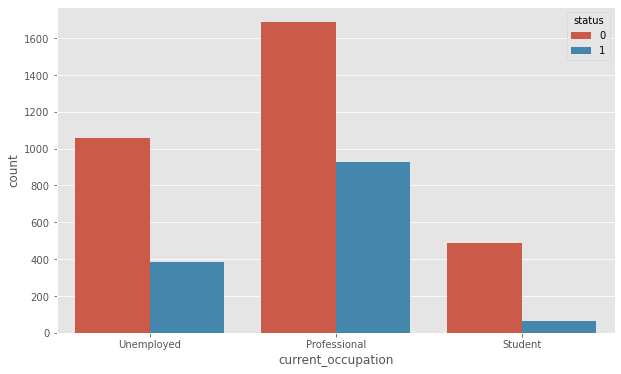

In [14]:
plt.figure(figsize = (10, 6))

sns.countplot(x = "current_occupation", hue = 'status', data = data)

plt.show()

Question 1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.


Answer 1: Based on the Count Plots above, it is clear that Professionals tend to participate in the program followed by Unemployed induviduals followed by students ( percentage of total per category is calculated)

1. Unemployed ratio (status 0:1) is 1058:383 so approx 26% of all   
2. Professional ratio (status 0:1) is 1687:929 so approx 35% of all 
3. Student ratio (status 0:1) is 490:65 so approx 12% of all


Hence, there is a higher chance that currently employed professionals pursue this. This makes sense as usually these courses require tuition/fees and those employed are in a better place to pay for it. Students usually have courses as part of their degree so it is less likely that they pursue an external course


In [15]:
data['first_interaction'].value_counts(1)

Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64

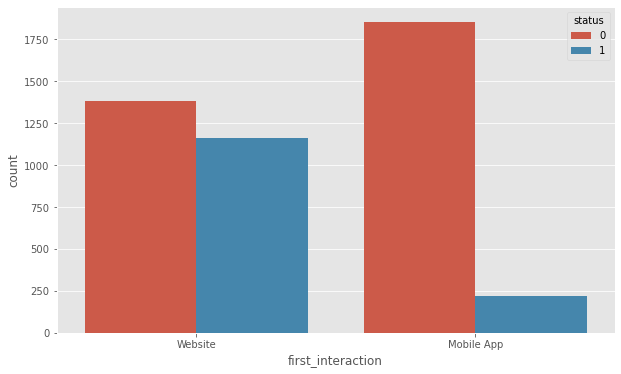

In [16]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'first_interaction', hue = 'status', data = data)

plt.show()

Question 2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 

Answer 2: Based on the Count Plots above, it is clear that for first interactions the website has a stronger influence in enrollment compared to mobile app 

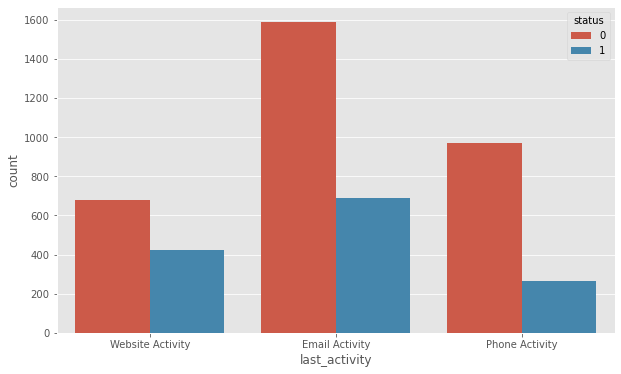

In [224]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'last_activity', hue = 'status', data = data)

plt.show()

Question 3:The company uses multiple modes to interact with prospects. Which way of interaction works best?

Answer 3: Based on the Count Plots above, it is clear that email  interactions on the website has a stronger influence in enrollment followed by website activity then phone

4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [231]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

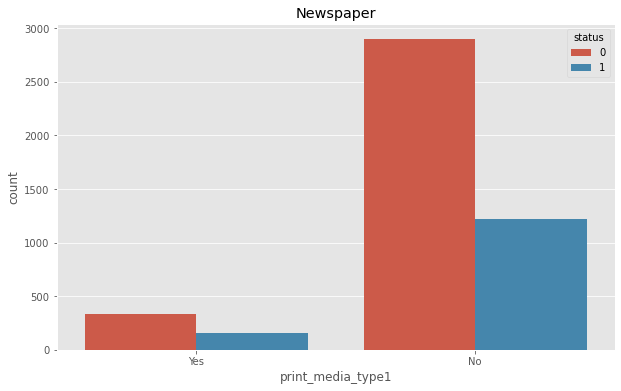

In [18]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'print_media_type1', hue = 'status', data = data)
plt.title('Newspaper')
plt.show()

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


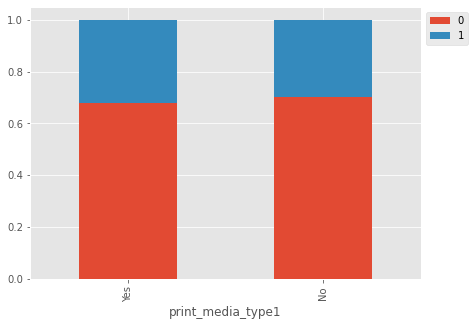

In [235]:
stacked_barplot(data, "print_media_type1", "status")

In [19]:
data.loc[data['print_media_type1'] == "Yes", "status"].value_counts()

0    338
1    159
Name: status, dtype: int64

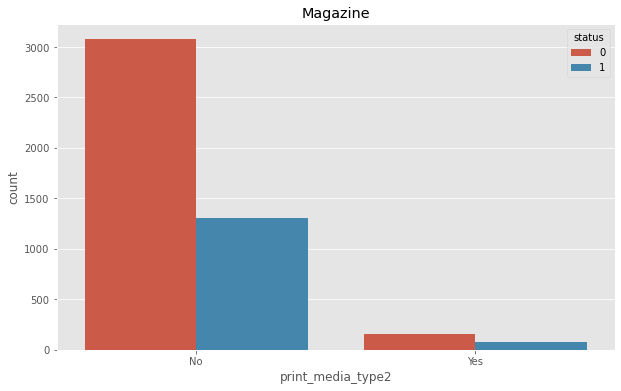

In [230]:
plt.figure(figsize = (10, 6))
data.loc[data['print_media_type2'] == "Yes", "status"].value_counts()

#sns.countplot(x = 'print_media_type2', hue = 'status', data = data)
c = sns.countplot(x = 'print_media_type2', hue = 'status', data = data)

plt.title('Magazine')
plt.show()

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


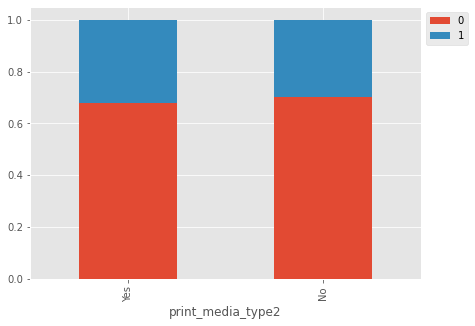

In [238]:
stacked_barplot(data, "print_media_type2", "status")


In [21]:
data.loc[data['print_media_type2'] == "Yes", "status"].value_counts()

0    158
1     75
Name: status, dtype: int64

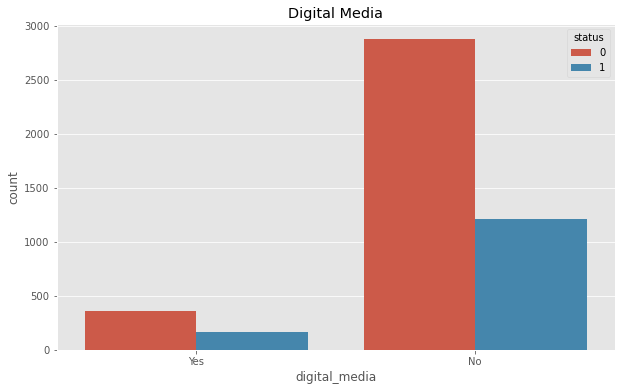

In [229]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'digital_media', hue = 'status', data = data)
plt.title('Digital Media')
plt.show()

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


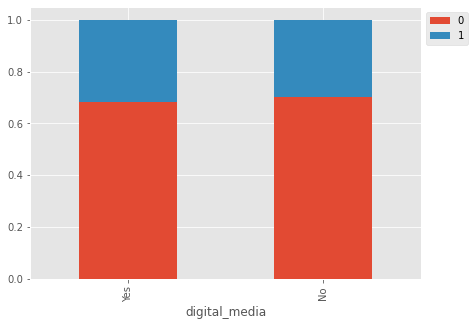

In [239]:
stacked_barplot(data, "digital_media", "status")


In [23]:
data.loc[data['digital_media'] == "Yes", "status"].value_counts()

0    359
1    168
Name: status, dtype: int64

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


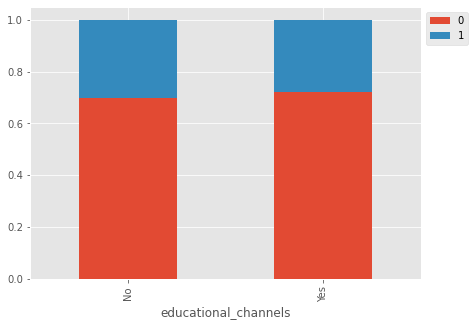

In [240]:
stacked_barplot(data, "educational_channels", "status")


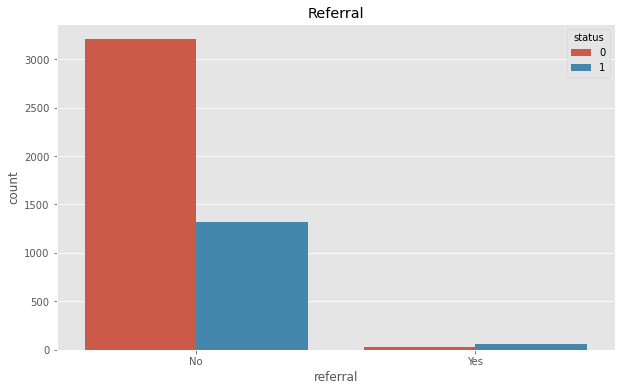

In [24]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)
plt.title('Referral')
plt.show()

In [25]:
data['referral'].value_counts()

No     4519
Yes      93
Name: referral, dtype: int64

In [26]:
Referred = data.loc[data['referral'] == "Yes", "status"].value_counts()

In [27]:
Referred.head()

# it is clear that Out of 93 referrals, 63 signed up for the course

1    63
0    30
Name: status, dtype: int64

From the count plot and the stacked plots it can be seen that ''educational_channles' (197 enrollments) is the best followed by digital_media'  (168 enrollments) is , followed by newspapers ( print_media_type1) and then referrals 

In [28]:
data.loc[data['profile_completed'] == "High", "status"].value_counts()

0    1318
1     946
Name: status, dtype: int64

In [29]:
data.loc[data['profile_completed'] == "Medium", "status"].value_counts()

0    1818
1     423
Name: status, dtype: int64

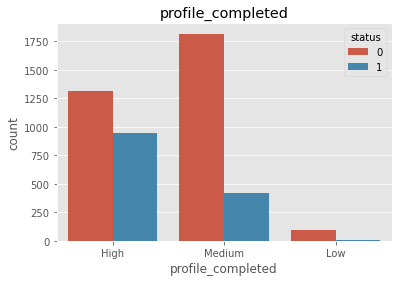

In [30]:
sns.countplot(x = 'profile_completed', hue = 'status', data = data)
plt.title('profile_completed')
plt.show()

Question 5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?
Answer 5: There is a strong connection between those who completed the profile ( medium and high) and enrolled for the classes. Having more detail about the prospect shows the keeness of the prospects. 

In [194]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    
#USED CODE FROM OTHER NOTEBOOKS FOR THIS

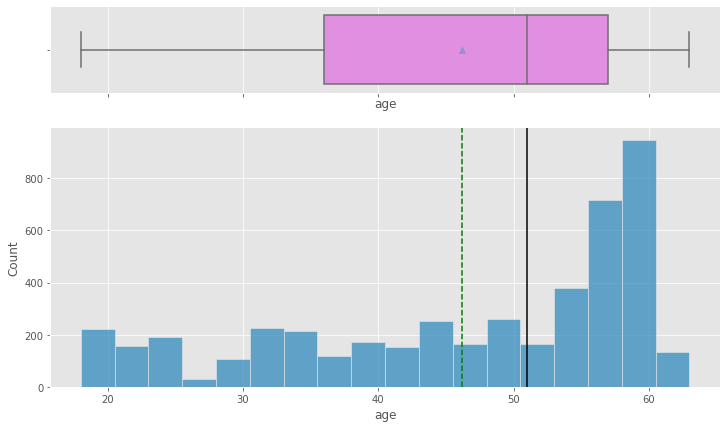

In [195]:
histogram_boxplot(data, "age") 


The median age of the students is 51, the plot is left skewed

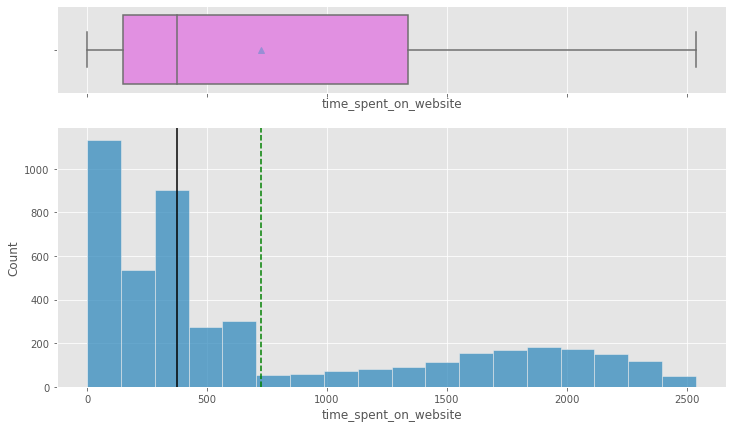

In [243]:
histogram_boxplot(data,  "time_spent_on_website"  ) 


<AxesSubplot:xlabel='status', ylabel='time_spent_on_website'>

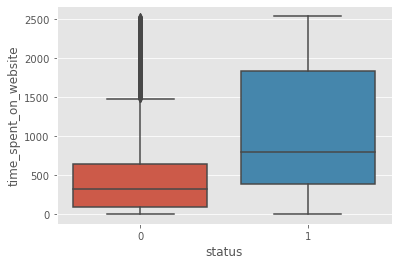

In [248]:
sns.boxplot(data = data , x=  "status" , y = "time_spent_on_website" ) 


The median time spent is of the students is 376 secs, and this has a significant contribution to students that were converted.

In [202]:
data[data["website_visits"] == 0].shape


(174, 14)

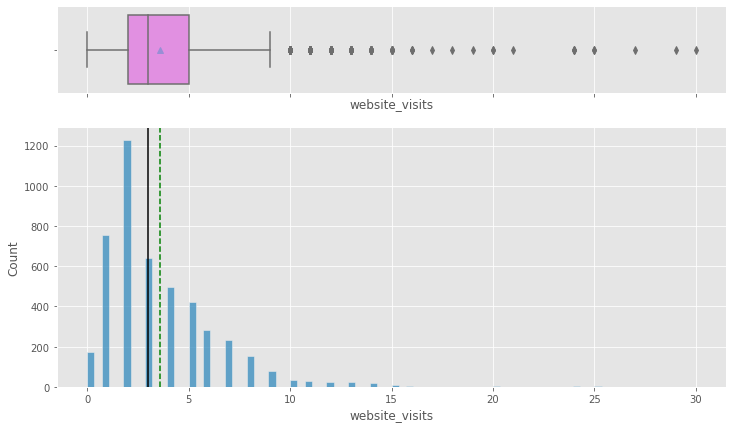

In [201]:
histogram_boxplot(data, "website_visits") 


<AxesSubplot:xlabel='status', ylabel='website_visits'>

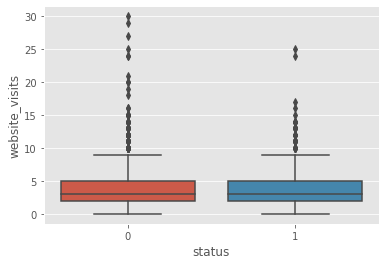

In [249]:
sns.boxplot(data = data , x=  "status" , y = "website_visits" ) 


The website visits histogram plot is right skewed
From the box plot above,'website_visits' column has a lot of outliers compared to other categories 

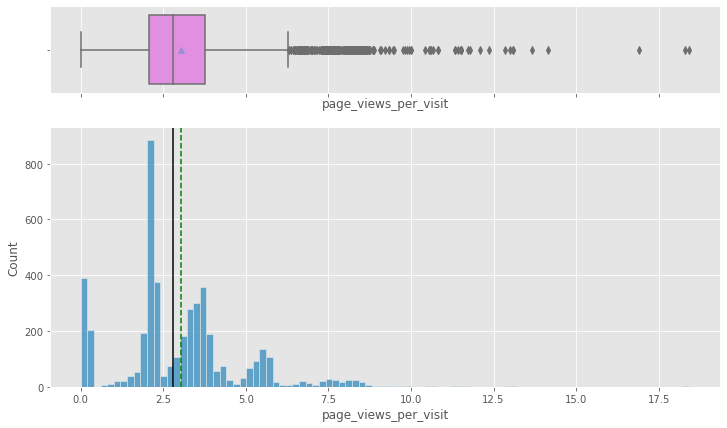

In [204]:
histogram_boxplot(data, "page_views_per_visit") 


<AxesSubplot:xlabel='status', ylabel='page_views_per_visit'>

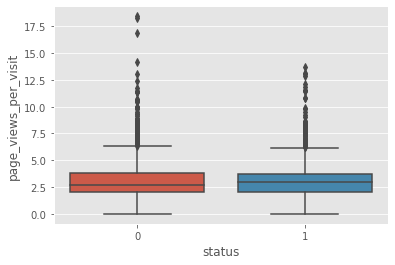

In [250]:
sns.boxplot(data = data , x=  "status" , y = "page_views_per_visit" ) 


From the box plot above, 'page_views_per_visit' column has a lot of outliers compared to other categories 

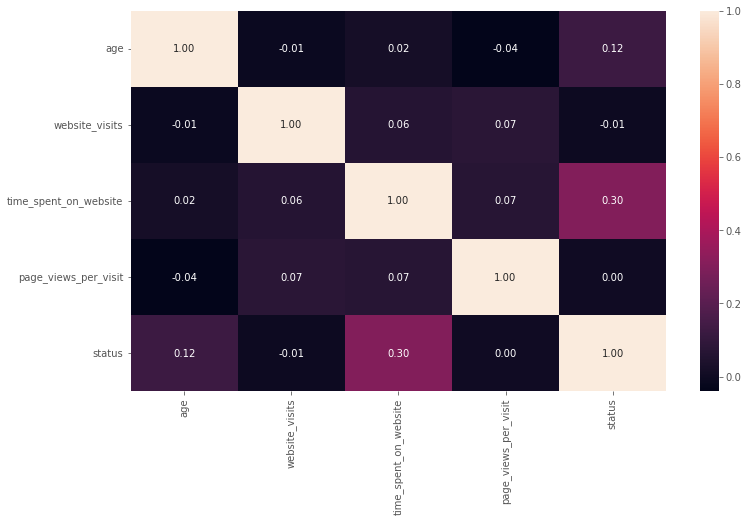

In [31]:
plt.figure(figsize = (12, 7))

sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [255]:
data.isnull().sum()
# no missing values 

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [ ]:
# outliers in 'page_views_per_visit' and 'website_visits' box plots
# not needed to treat since they are only 2 columns, are we still do not know the weightage of these features

In [32]:
X = data.drop(columns = 'status')
X = data.drop (['status'], axis = 1)

Y = data['status']

# seperating dataset into X (feautures) and Y (target)

In [34]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [35]:
X

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,1,0,0,1,1,0,0,0,0,1,0
4608,55,8,2327,5.393,0,0,0,0,1,0,0,0,0,0,0,0
4609,58,2,212,2.692,0,0,1,0,0,0,0,0,0,0,0,0
4610,57,1,154,3.879,0,0,0,0,1,0,1,1,0,0,0,0


In [37]:
X.shape

(4612, 16)

In [38]:
Y


0       1
1       0
2       0
3       1
4       0
       ..
4607    0
4608    0
4609    1
4610    0
4611    0
Name: status, Length: 4612, dtype: int64

In [39]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 1)

In [40]:
x_train


,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
314,45,1,613,1.846,0,0,0,0,1,0,0,0,0,0,0,0
1299,62,1,97,3.182,0,1,1,0,0,0,1,1,0,0,0,0
834,21,2,1745,0.160,1,0,0,0,0,0,0,0,0,0,0,0
1080,51,2,2068,2.245,0,1,0,0,0,1,0,0,0,0,0,0
2117,56,2,892,3.899,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,56,1,281,5.347,0,1,0,0,0,0,0,0,0,0,0,0
2763,44,1,64,5.051,0,0,1,0,0,0,1,0,1,0,1,0
905,26,1,211,0.291,0,0,1,0,1,0,0,0,0,0,0,0
3980,57,1,1186,1.224,0,1,1,0,0,0,1,0,0,0,0,0


In [41]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)


In [42]:
print("Shape of Training set - Target : ", y_train.shape)
print("Shape of test set - Target : ", y_test.shape)

Shape of Training set - Target :  (3689,)
Shape of test set - Target :  (923,)


## Building a Decision Tree model

In [359]:
clf = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, criterion = 'entropy', max_depth = 6, random_state = 7)

#class_weight={0: 0.3, 1: 0.7}, nax_depth = 6

# Fitting the model on the train data
clf = clf.fit(x_train, y_train)


## Model Performance evaluation and improvement

In [46]:

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Customer', 'Customer'], yticklabels = ['Not Customer', 'Customer'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()
    
# got this code from Mentoring session 

In [47]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

# got this code from Mentoring session 

For this model prediction, the recall value is the most important parameter and that is the one I aim to improve 

This is because we want to maximize the number of customers that the company. We want to minimize the false negative rate (that is the 'true' customers that are predicted as 'not customers') so that we do not lose out on potential clients.

For all the confusion matrices shown, my goal is to improve the recall rata for category 1 ( which represents paid students prediction score) in the train and test 

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2600
           1       0.71      0.88      0.78      1089

    accuracy                           0.86      3689
   macro avg       0.83      0.86      0.84      3689
weighted avg       0.87      0.86      0.86      3689



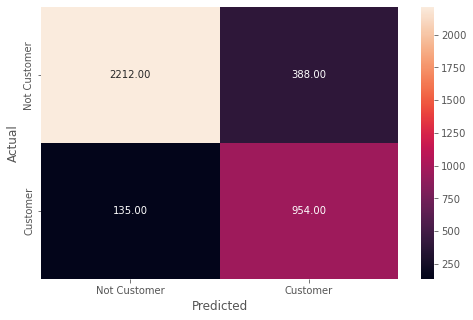

In [361]:
y_pred_train = clf.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       635
           1       0.72      0.84      0.77       288

    accuracy                           0.85       923
   macro avg       0.82      0.85      0.83       923
weighted avg       0.86      0.85      0.85       923



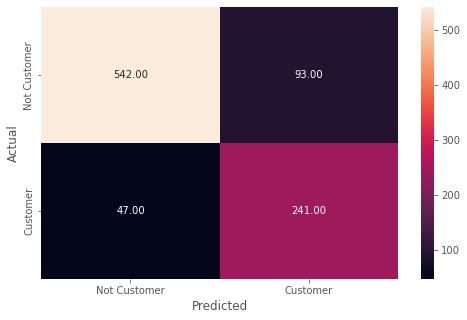

In [362]:
y_pred_test = clf.predict(x_test)

metrics_score(y_test, y_pred_test)

In [367]:
dtree_test = model_performance_classification(clf,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.82088,0.845174,0.848321


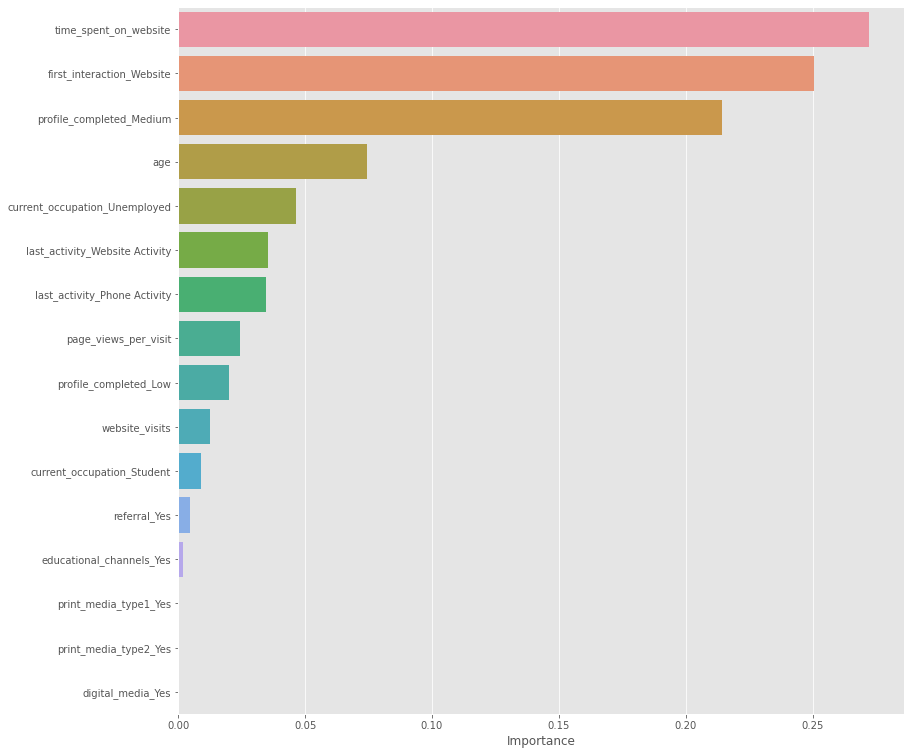

In [368]:
# Plot the feature importance

importances = clf.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

Using Grid CV to see if there are any parameters that can be tuned to get a better recall rate

In [371]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

#  class_weight = {0: 0.3, 1: 0.7}
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(3, 8), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [ 5, 10, 20, 25],
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)


scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)





DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2600
           1       0.59      0.91      0.72      1089

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.77      3689
weighted avg       0.84      0.79      0.80      3689



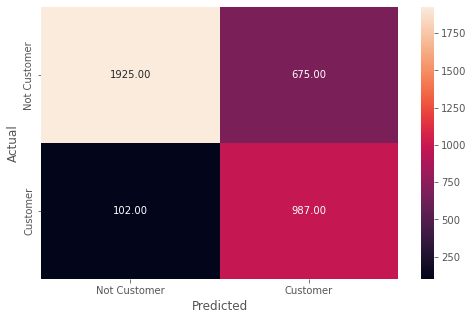

In [372]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(x_train)

metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       635
           1       0.61      0.88      0.72       288

    accuracy                           0.79       923
   macro avg       0.77      0.81      0.78       923
weighted avg       0.83      0.79      0.80       923



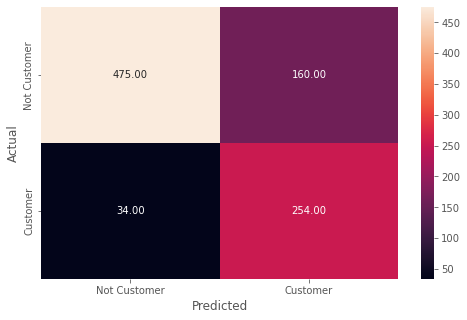

In [373]:
# Checking performance on the training data
y_pred_test2 = d_tree_tuned.predict(x_test)

metrics_score(y_test, y_pred_test2)

In [380]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.773364,0.814988,0.789816


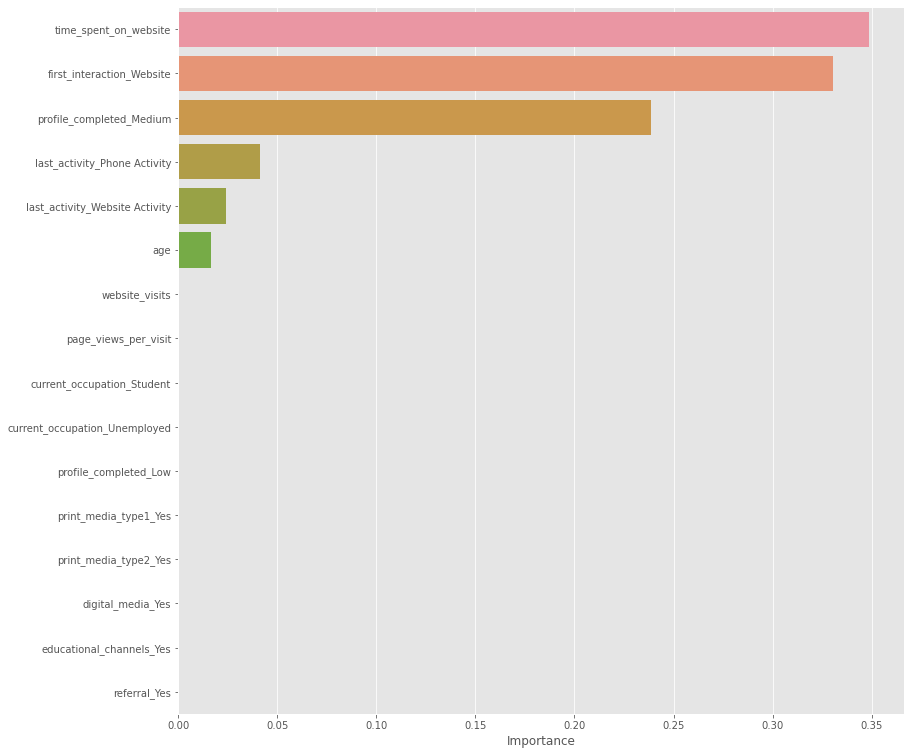

In [365]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

After tuning the Decision tree, the most important features seem to be 'time_spent_on_website', 'first_interaction_website' and 'completed_profile_medium')

The tuned model biases toward certain features




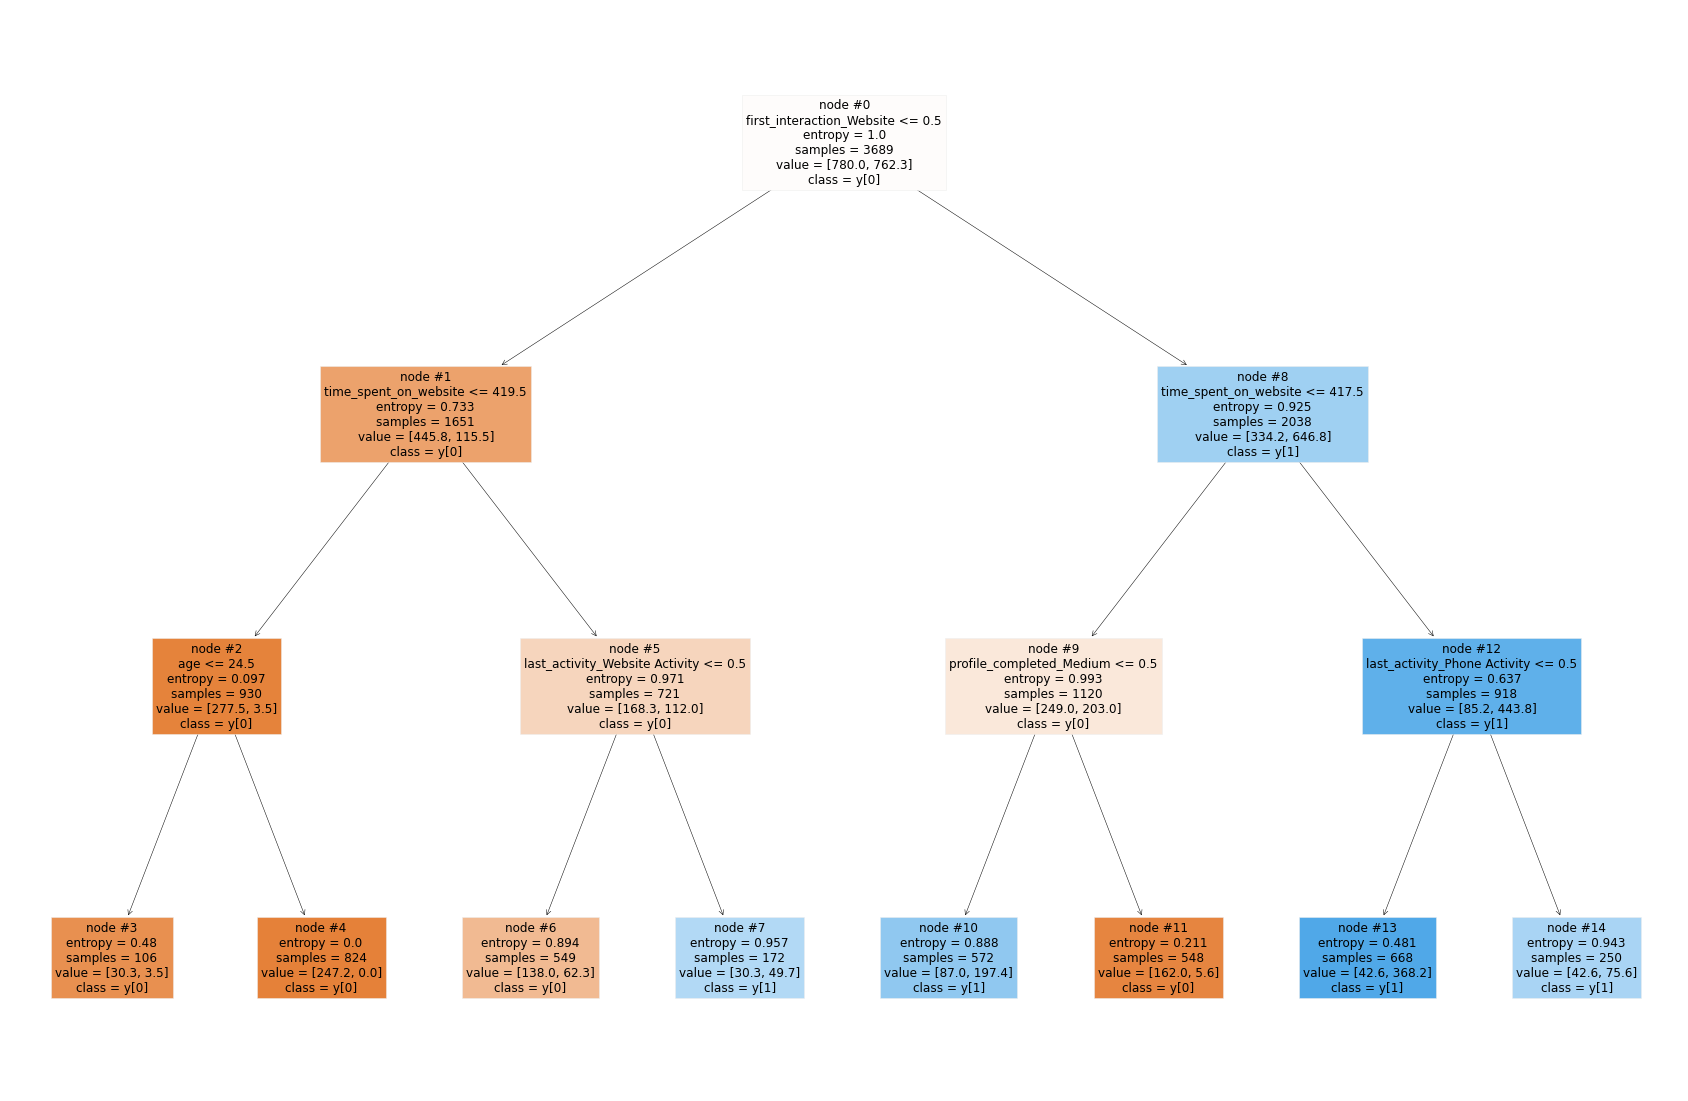

In [381]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(d_tree_tuned, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [ ]:
The misclassification error on training data decreases significantly after depth of 6, but test misclassification error stays the same

## Building a Random Forest model

In [382]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5, min_samples_leaf=5, random_state=7)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      2600
           1       0.66      0.89      0.76      1089

    accuracy                           0.83      3689
   macro avg       0.81      0.85      0.82      3689
weighted avg       0.86      0.83      0.84      3689



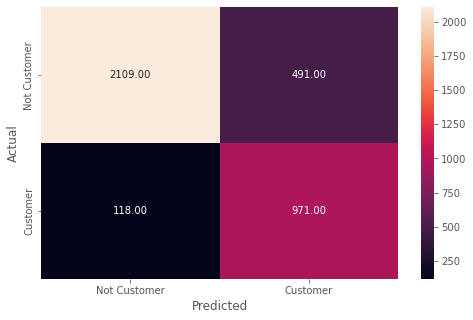

In [383]:
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       635
           1       0.69      0.88      0.77       288

    accuracy                           0.84       923
   macro avg       0.81      0.85      0.82       923
weighted avg       0.86      0.84      0.84       923



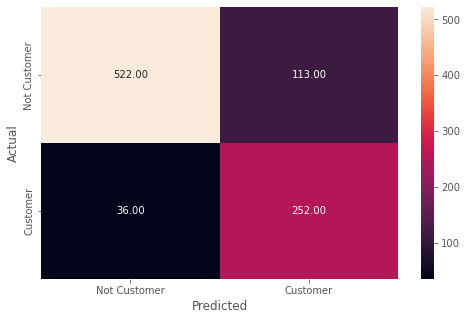

In [384]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [385]:
RF_tuned_test = model_performance_classification(rf_estimator,x_test,y_test)
RF_tuned_test

,Precision,Recall,Accuracy
0,0.812947,0.848524,0.83857


<AxesSubplot:xlabel='Importance'>

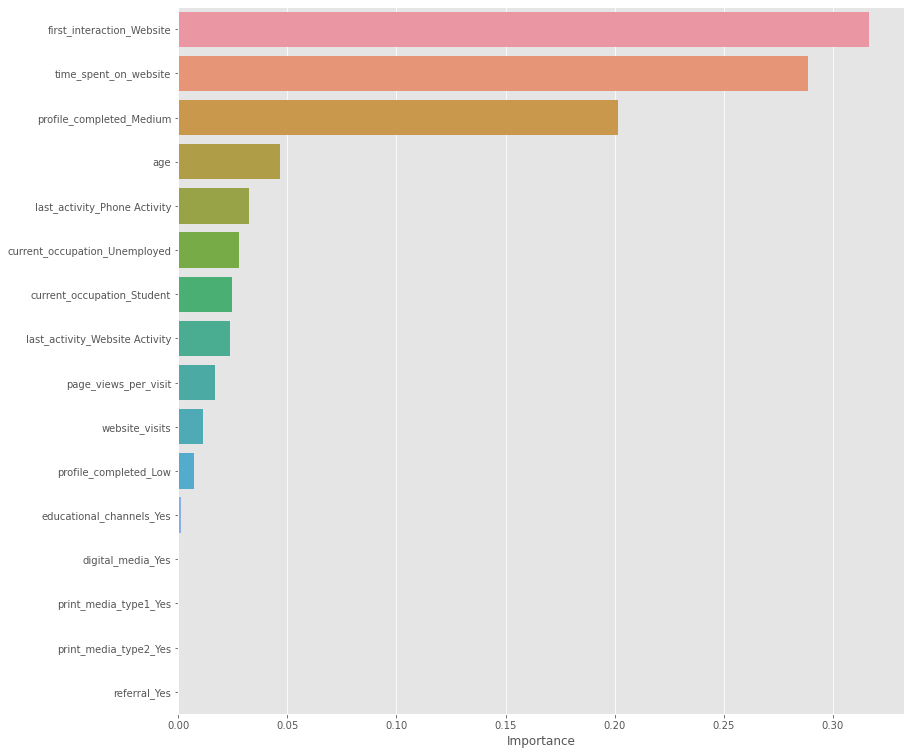

In [386]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

Adding random forests increased our recall rate to 88% and all the feautures are being weighted in.

We know this from our previous search: DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=7)

## Model Performance evaluation and improvement

In [387]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth=6, random_state = 7)

# Grid of parameters to choose from
params_rf = {
        "min_samples_leaf": [2, 4, 8, 10, 12, 14],
        "n_estimators": [10, 50, 80, 100, 120],
        "max_features": [0.7, 0.9, 'auto'],
        "max_samples": [0.9, 1]
    
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [388]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       max_features=0.7, max_samples=0.9, min_samples_leaf=14,
                       n_estimators=50, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2600
           1       0.69      0.88      0.77      1089

    accuracy                           0.85      3689
   macro avg       0.82      0.86      0.83      3689
weighted avg       0.87      0.85      0.85      3689



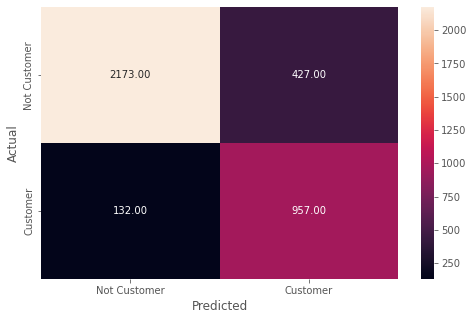

In [389]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       635
           1       0.71      0.85      0.78       288

    accuracy                           0.85       923
   macro avg       0.82      0.85      0.83       923
weighted avg       0.86      0.85      0.85       923



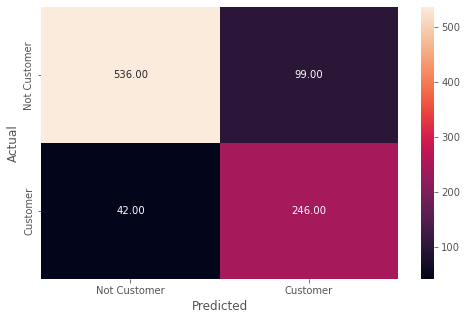

In [390]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [391]:
dtree_tuned_test = model_performance_classification(rf_estimator_tuned,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.82019,0.849131,0.847237


CONCLUSION: The tuned Random Forest (that was not tuned) perform similarly to the tuned decision tree at with a recall rate of 88% for status = 1, but it also has the additional advantage of having higher precision and better f1 score of 77%. The tuned random forest only has slight improvements compared to the non-tuned one. 

We have succcessfully created a model that can minimize false negatives. Since the behavior of the tuned Decision tree and non-tuned Random forest is comparable, I think the Random forest would have performed better if the dataset was larger.

## Actionable Insights and Recommendations

- It can be seen that 'Time Spent on Website' and 'First Interaction' are the two main features that drive whether an induvidual is a paid customer or not. 
- It can be advised to the staff of ExtraaLearn to allocate more resources ( such as Software and Content) to improving the website so that users can get all the important information within a few clicks. This also relates to the First interaction that the customer has on the website which converts to more paid customers 
- Similarly 'Profile Completed' can be a great way to gauge the interest of the people and the sales staff should target these induviduals who have medium or higher completion
- It can be seen that 'print_media_type2' and 'digital_media' have very low effects on the decision tree, so it can be said that these are less effective methods of advertisements for the company 
- They should advertise by partnering with existing institutions or career websites where a particular category of jobs are being searched 
- The company can also have a 'pay later' plan for students/unemployed so more people can afford the course 
- The organization can focus on improving the curriculum and environment ( support staff ) to make learning easier 
- Have flexible schedules so that people from different age groups can accomodate this in their schedule 
